In [4]:
import os
import subprocess
import sys

gitroot_path = subprocess.check_output(
    ["git", "rev-parse", "--show-toplevel"], universal_newlines=True
)

sys_dir = os.path.dirname(os.getcwd())
sys.path.append(sys_dir)
print("Directory added to path: ", sys_dir)

%load_ext autoreload
%autoreload 2
#%load_ext jupyter_black

Directory added to path:  /home/fran/ADAF


In [41]:
# Import necessary libraries
import os
import logging
from utils.logging_utils import config_logger, log_to_file
from utils.YParams import YParams

from inference import setup, inference

# Configure logger
config_logger()

# Define your parameters manually
params = YParams('/home/fran/ADAF/expt/config.yaml', 'EncDec')
params["resuming"] = False
params["seed"] = 0
params["experiment_dir"] = '/home/fran/ADAF/expt'
params["test_data_path"] = '/home/fran/ADAF/data/test'
params["best_checkpoint_path"] = '/home/fran/ADAF/model_weights/best_ckpt.tar'

# Set up logging
log_to_file(
    logger_name=None,
    log_filename=os.path.join(params["experiment_dir"], "inference.log"),
)
params.log()

# Get data files and model
test_data_file_paths, inference_times, model = setup(params)

target_variable = [var.split("_")[1] for var in params.field_tar_vars]

2025-02-06 00:04:18,327 - root - INFO - ------------------ Configuration ------------------
2025-02-06 00:04:18,329 - root - INFO - Configuration file: /home/fran/ADAF/expt/config.yaml
2025-02-06 00:04:18,331 - root - INFO - Configuration name: EncDec
2025-02-06 00:04:18,332 - root - INFO - nettype: EncDec
2025-02-06 00:04:18,334 - root - INFO - lr: 0.002
2025-02-06 00:04:18,335 - root - INFO - upscale: 1
2025-02-06 00:04:18,336 - root - INFO - in_chans: 29
2025-02-06 00:04:18,337 - root - INFO - out_chans: 4
2025-02-06 00:04:18,338 - root - INFO - img_size_x: 1280
2025-02-06 00:04:18,339 - root - INFO - img_size_y: 512
2025-02-06 00:04:18,341 - root - INFO - window_size: 4
2025-02-06 00:04:18,342 - root - INFO - patch_size: 4
2025-02-06 00:04:18,343 - root - INFO - num_feat: 64
2025-02-06 00:04:18,344 - root - INFO - drop_rate: 0.1
2025-02-06 00:04:18,345 - root - INFO - drop_path_rate: 0.1
2025-02-06 00:04:18,349 - root - INFO - attn_drop_rate: 0.1
2025-02-06 00:04:18,350 - root - IN

2025-02-06 00:04:18,368 - root - INFO - scheduler: ReduceLROnPlateau
2025-02-06 00:04:18,370 - root - INFO - lr_reduce_factor: 0.65
2025-02-06 00:04:18,371 - root - INFO - num_data_workers: 8
2025-02-06 00:04:18,372 - root - INFO - enable_nhwc: False
2025-02-06 00:04:18,373 - root - INFO - exp_dir: ./exp
2025-02-06 00:04:18,374 - root - INFO - data_path: /home/fran/ADAF/data/
2025-02-06 00:04:18,375 - root - INFO - train_data_path: /home/fran/ADAF/data/train
2025-02-06 00:04:18,377 - root - INFO - valid_data_path: /home/fran/ADAF/data/valid
2025-02-06 00:04:18,378 - root - INFO - test_data_path: /home/fran/ADAF/data/test
2025-02-06 00:04:18,379 - root - INFO - norm_type: variable_wise_ignore_extreme
2025-02-06 00:04:18,380 - root - INFO - normalization: minmax_ignore_extreme
2025-02-06 00:04:18,381 - root - INFO - add_noise: False
2025-02-06 00:04:18,382 - root - INFO - N_in_channels: 21
2025-02-06 00:04:18,383 - root - INFO - N_out_channels: 5
2025-02-06 00:04:18,384 - root - INFO - e

In [42]:
# Run inference
inference(
    params,
    target_variable,
    test_data_file_paths,
    inference_times,
    0.3,  # hold_out_obs_ratio
    model,
)

logging.info("Done")

2025-02-06 00:04:20,651 - root - INFO - -----------------------------------------
2025-02-06 00:04:20,653 - root - INFO - Analysis time: 2022-10-01_06
2025-02-06 00:04:20,654 - root - INFO - Reading /home/fran/ADAF/data/test/2022-10-01_06.nc


ic| obs_num: 655360, hold_out_num: 196608
ic| len(hold_out_obs_index): 196608
    hold_out_obs_index: array([324665, 460798, 111494, ...,  80295, 134230, 228216])
ic| len(input_obs_index): 458752
    input_obs_index: array([279011, 393699,  81855, ..., 155212, 487722, 628707])
ic| field_target.shape: (4, 512, 1280)


inp_obs_for_eval: (4, 512, 1280)


ic| field_tar_stats:    variable     max   min
                     6    rtma_q   0.025   0.0
                     5    rtma_t  50.000 -40.0
                     7  rtma_u10  25.000 -25.0
                     8  rtma_v10  25.000 -25.0
ic| field_tar_stats:    variable     max   min
                     12    sta_q   0.025   0.0
                     11    sta_t  50.000 -40.0
                     13  sta_u10  25.000 -25.0
                     14  sta_v10  25.000 -25.0
ic| field_tar_stats:    variable     max   min
                     12    sta_q   0.025   0.0
                     11    sta_t  50.000 -40.0
                     13  sta_u10  25.000 -25.0
                     14  sta_v10  25.000 -25.0
ic| field_tar_stats:    variable     max   min
                     6    rtma_q   0.025   0.0
                     5    rtma_t  50.000 -40.0
                     7  rtma_u10  25.000 -25.0
                     8  rtma_v10  25.000 -25.0


inference time: 1.3171193599700928


2025-02-06 00:05:11,202 - root - INFO - q:
2025-02-06 00:05:11,208 - root - INFO - rmse_ai_hold_obs=1.091
2025-02-06 00:05:11,209 - root - INFO - rmse_bg_hold_obs=1.15
2025-02-06 00:05:11,214 - root - INFO - rmse_ai_inp_obs=0.319
2025-02-06 00:05:11,215 - root - INFO - rmse_bg_inp_obs=1.137
2025-02-06 00:05:11,240 - root - INFO - rmse_ai_field=0.401
2025-02-06 00:05:11,248 - root - INFO - rmse_bg_field=0.48
2025-02-06 00:05:11,250 - root - INFO - AI generation    :0.296~ 21.341
2025-02-06 00:05:11,251 - root - INFO - Background (hrrr):1.0720000267028809~ 21.68400001525879
2025-02-06 00:05:11,253 - root - INFO - hold out obs     :0.112~ 23.565
2025-02-06 00:05:11,254 - root - INFO - field_target     :0.952~ 21.645
2025-02-06 00:05:11,254 - root - INFO - t:
2025-02-06 00:05:11,258 - root - INFO - rmse_ai_hold_obs=1.828
2025-02-06 00:05:11,260 - root - INFO - rmse_bg_hold_obs=1.958
2025-02-06 00:05:11,264 - root - INFO - rmse_ai_inp_obs=0.992
2025-02-06 00:05:11,265 - root - INFO - rmse_b

## Inspect the data

In [104]:
import xarray as xr

input_data_path = '/home/fran/ADAF/data/test/2022-10-01_06.nc'
ds = xr.open_dataset(input_data_path)

for var_name, var_data in ds.variables.items():
    print(f"Variable Name: {var_name}")
    print(f"Data: {var_data}")
    print(f"Shape: {var_data.shape}")
    print(f"Dimensions: {var_data.dims}")
    print("-" * 40)

Variable Name: z
Data: <xarray.Variable (lat: 512, lon: 1280)> Size: 3MB
[655360 values with dtype=float32]
Shape: (512, 1280)
Dimensions: ('lat', 'lon')
----------------------------------------
Variable Name: obs_mask
Data: <xarray.Variable (lat: 512, lon: 1280)> Size: 5MB
[655360 values with dtype=float64]
Shape: (512, 1280)
Dimensions: ('lat', 'lon')
----------------------------------------
Variable Name: rtma_q
Data: <xarray.Variable (lat: 512, lon: 1280)> Size: 3MB
[655360 values with dtype=float32]
Shape: (512, 1280)
Dimensions: ('lat', 'lon')
----------------------------------------
Variable Name: rtma_sp
Data: <xarray.Variable (lat: 512, lon: 1280)> Size: 3MB
[655360 values with dtype=float32]
Shape: (512, 1280)
Dimensions: ('lat', 'lon')
----------------------------------------
Variable Name: rtma_t
Data: <xarray.Variable (lat: 512, lon: 1280)> Size: 3MB
[655360 values with dtype=float32]
Shape: (512, 1280)
Dimensions: ('lat', 'lon')
----------------------------------------
Va

### Plot background variables

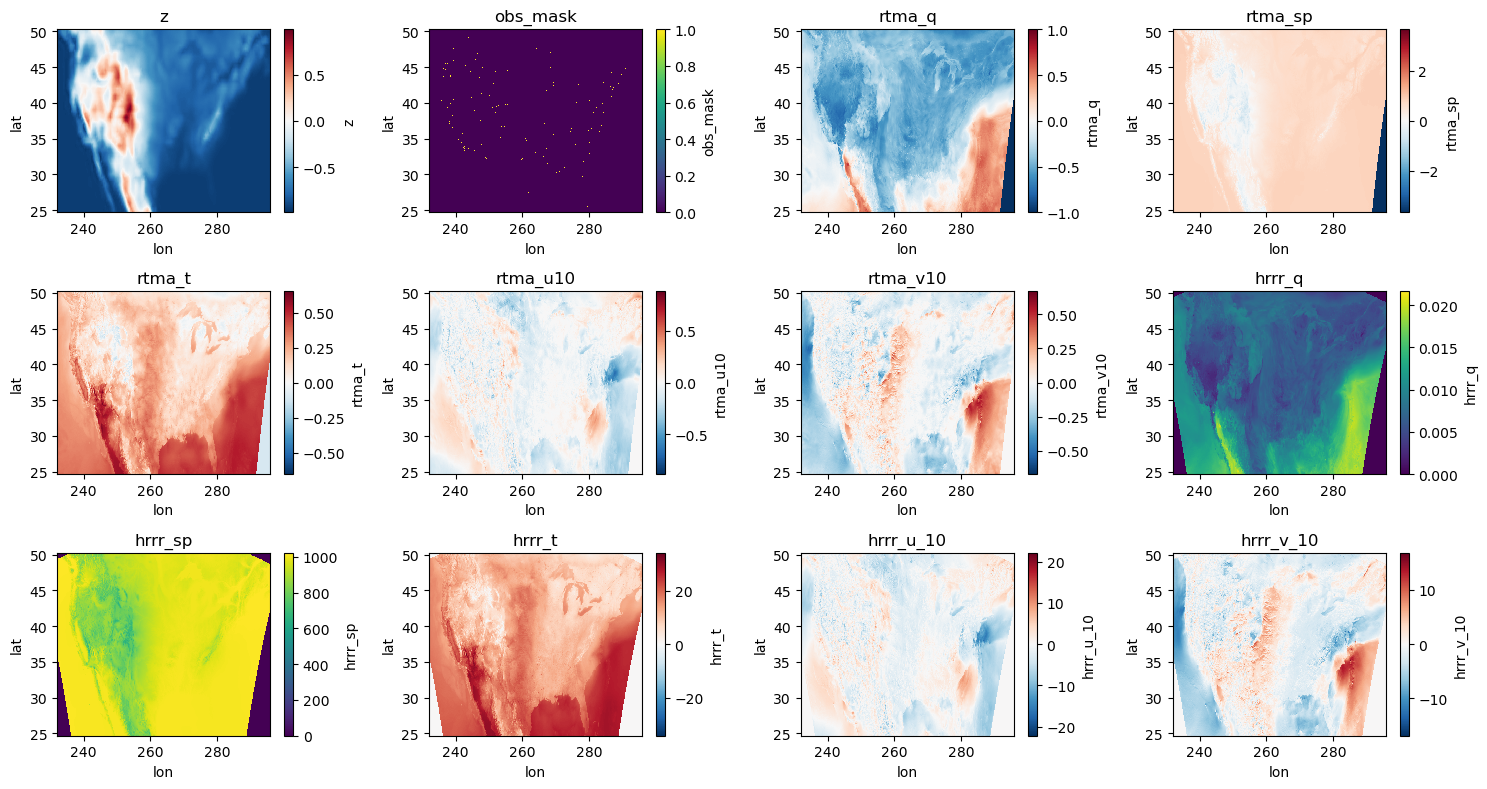

In [132]:
import matplotlib.pyplot as plt
import numpy as np

# Filter variables with dimensions ('lat', 'lon')
background_vars = [var_name for var_name, var_data in ds.data_vars.items() if var_data.dims == ('lat', 'lon')]

nrows = int(np.sqrt(len(background_vars)))
ncols = len(background_vars) // nrows
# Create a figure for plotting
fig, axes = plt.subplots(nrows=nrows, ncols=ncols, figsize=(15, 8))
axes = axes.flatten()

# Iterate through the background variables
for idx, var_name in enumerate(background_vars):
    var_data = ds[var_name]
    ax = axes[idx]
    var_data.plot(ax=ax)
    ax.set_title(var_name)

# Adjust layout
plt.tight_layout()
plt.show()

### Plot surface weather observations

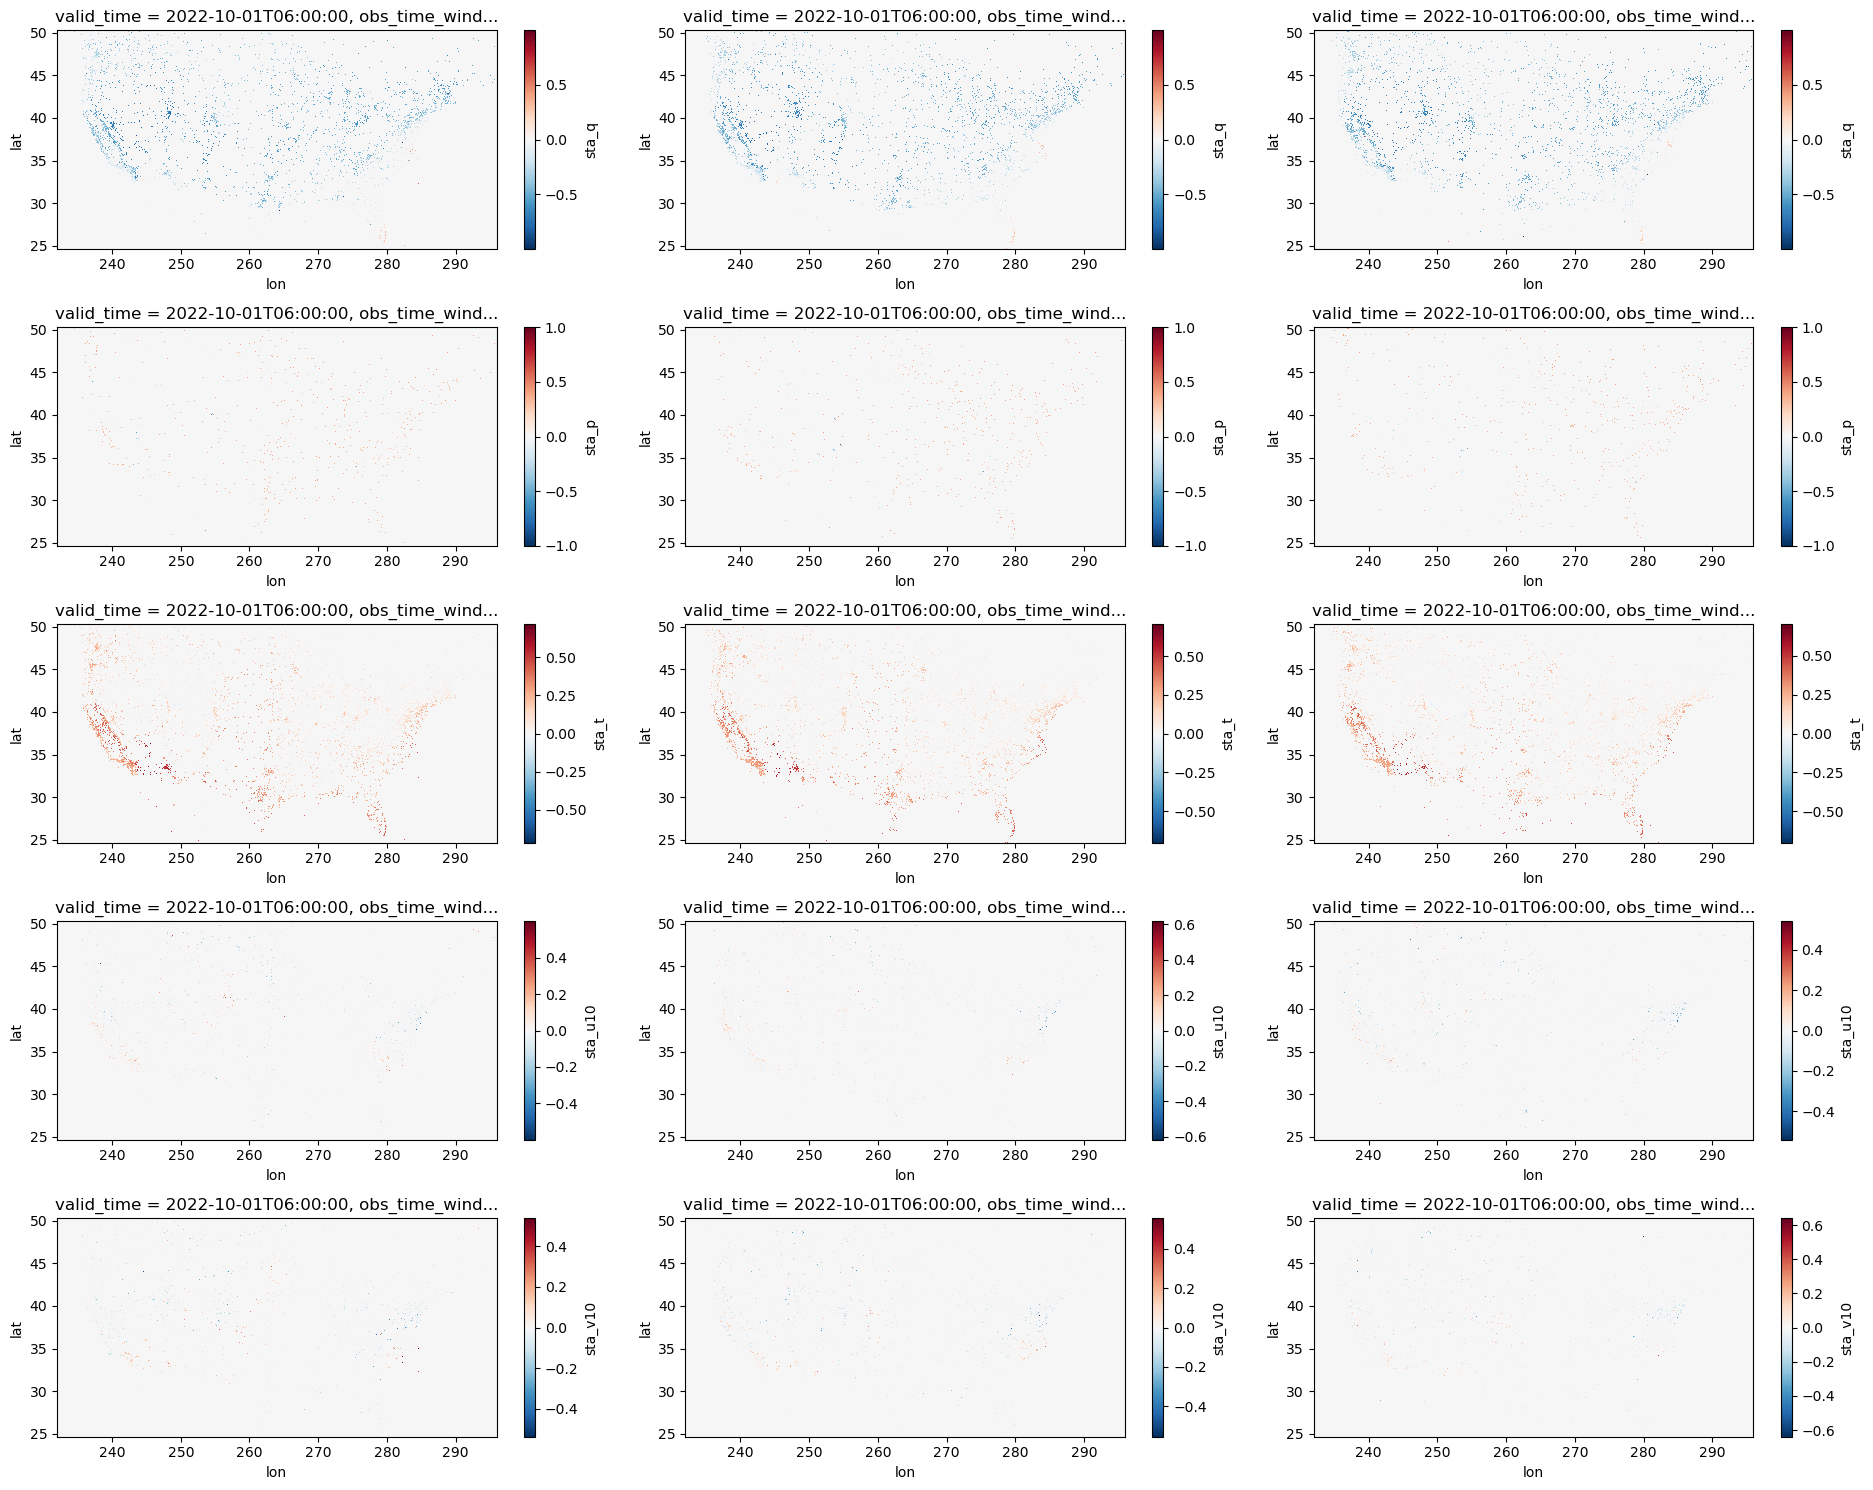

In [128]:
surface_weather_obs_vars = [var_name for var_name, var_data in ds.data_vars.items() if var_data.dims == ('obs_time_window','lat', 'lon')]
nrows = len(surface_weather_obs_vars)
ncols = 3
# Create a figure for plotting
fig, axes = plt.subplots(nrows=nrows, ncols=ncols, figsize=(19, 15))

# Iterate through the background variables
for name_idx, var_name in enumerate(surface_weather_obs_vars):
    var_data = ds[var_name]
    for obs_time_id in ds['obs_time_window']:
        ax = axes[name_idx, obs_time_id]
        var_data[obs_time_id].plot(ax=ax)

# Adjust layout
plt.tight_layout()
plt.show()

### Plot satellite observations

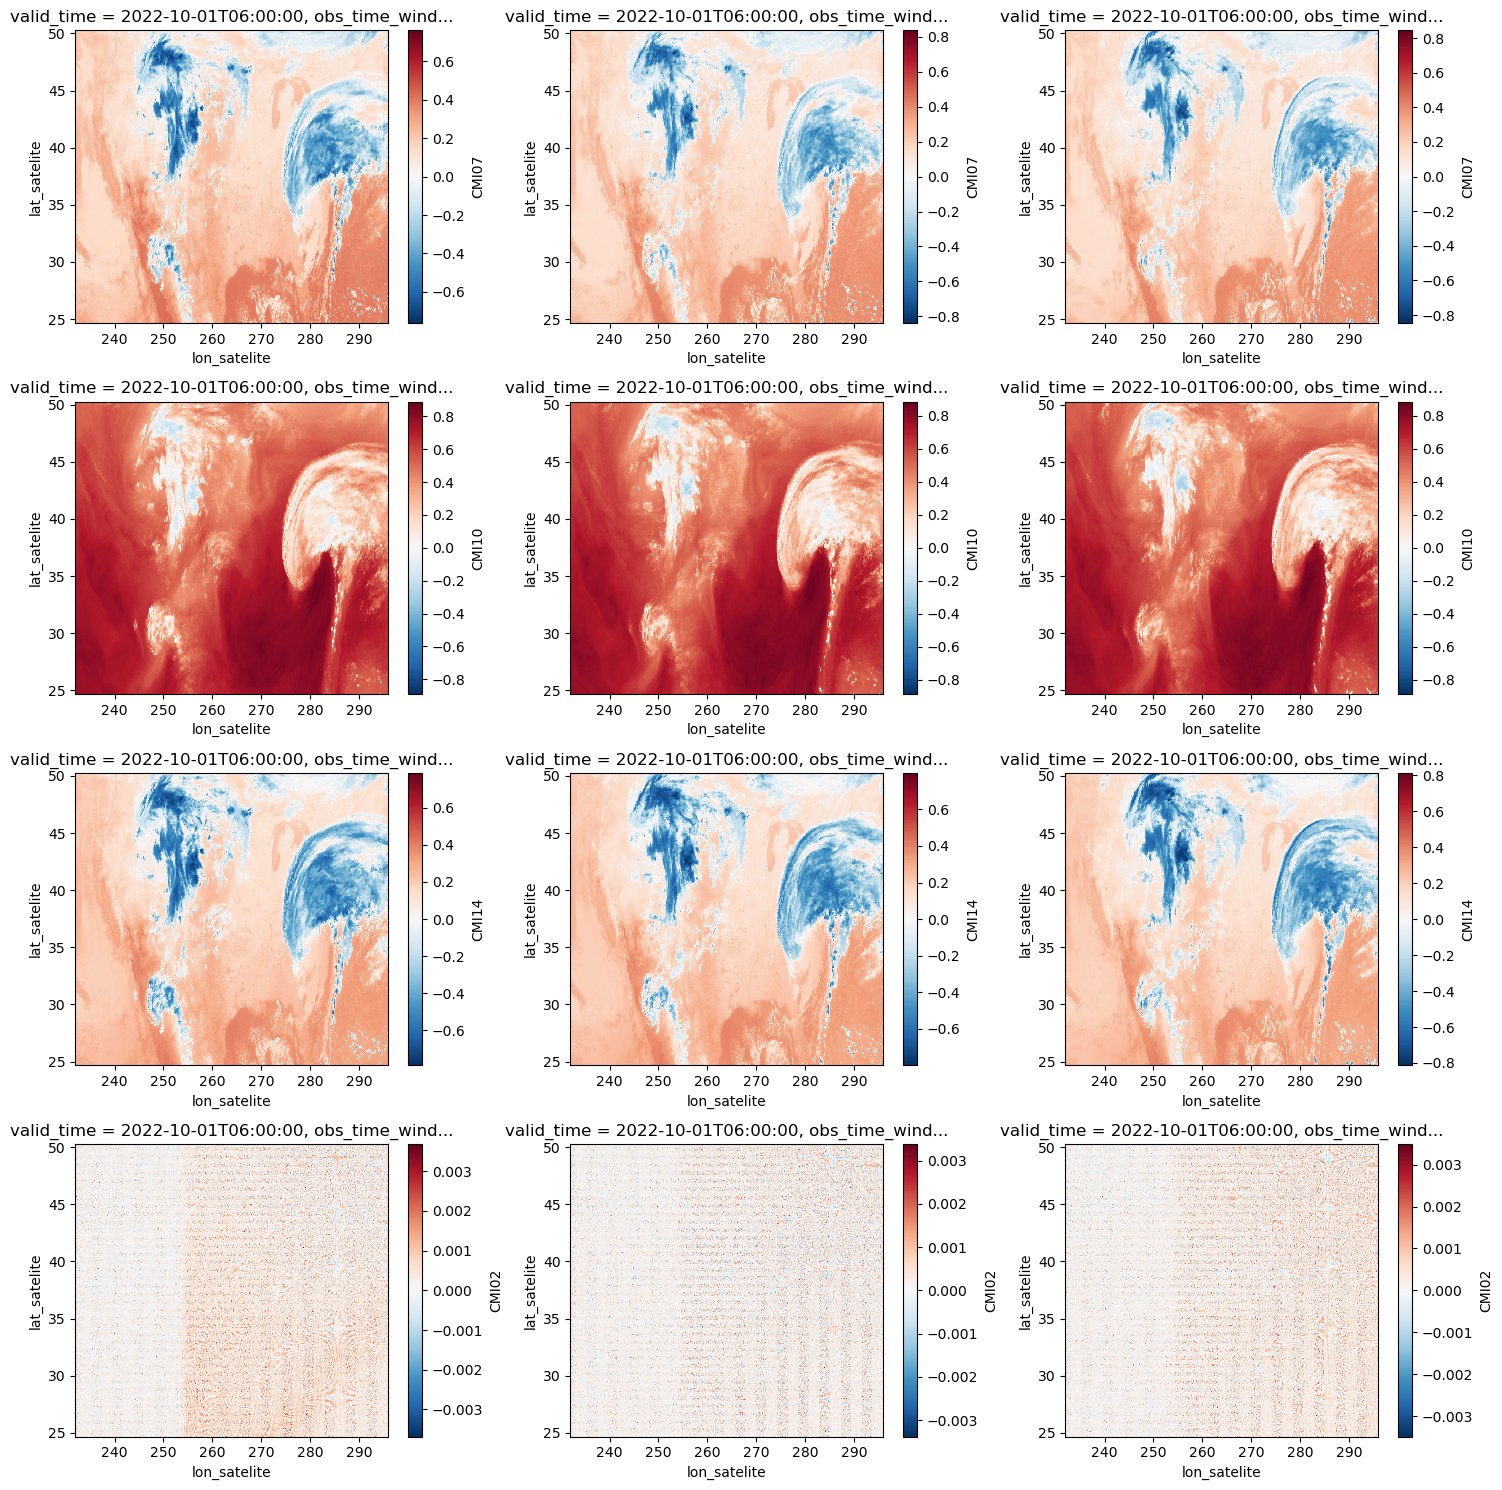

In [127]:
satellite_obs_vars = [var_name for var_name, var_data in ds.data_vars.items() if var_data.dims == ('obs_time_window','lat_satelite', 'lon_satelite')]
nrows = len(satellite_obs_vars)
ncols = 3
# Create a figure for plotting
fig, axes = plt.subplots(nrows=nrows, ncols=ncols, figsize=(15, 15))

# Iterate through the background variables
for name_idx, var_name in enumerate(satellite_obs_vars):
    var_data = ds[var_name]
    for obs_time_id in ds['obs_time_window']:
        ax = axes[name_idx, obs_time_id]
        var_data[obs_time_id].plot(ax=ax)

# Adjust layout
plt.tight_layout()
plt.show()

## Visualize the output (analysis)

In [133]:
output_data_path = '/home/fran/ADAF/expt/inference_ensemble_1_hold_0.3/2022-10-01_06.nc'
output_ds = xr.open_dataset(output_data_path)

for var_name, var_data in output_ds.variables.items():
    print(f"Variable Name: {var_name}")
    print(f"Data: {var_data}")
    print(f"Shape: {var_data.shape}")
    print(f"Dimensions: {var_data.dims}")
    print("-" * 40)

Variable Name: ai_gen_q
Data: <xarray.Variable (ensemble_num: 1, lat: 512, lon: 1280)> Size: 5MB
[655360 values with dtype=float64]
Shape: (1, 512, 1280)
Dimensions: ('ensemble_num', 'lat', 'lon')
----------------------------------------
Variable Name: ai_gen_t
Data: <xarray.Variable (ensemble_num: 1, lat: 512, lon: 1280)> Size: 5MB
[655360 values with dtype=float64]
Shape: (1, 512, 1280)
Dimensions: ('ensemble_num', 'lat', 'lon')
----------------------------------------
Variable Name: ai_gen_u10
Data: <xarray.Variable (ensemble_num: 1, lat: 512, lon: 1280)> Size: 5MB
[655360 values with dtype=float64]
Shape: (1, 512, 1280)
Dimensions: ('ensemble_num', 'lat', 'lon')
----------------------------------------
Variable Name: ai_gen_v10
Data: <xarray.Variable (ensemble_num: 1, lat: 512, lon: 1280)> Size: 5MB
[655360 values with dtype=float64]
Shape: (1, 512, 1280)
Dimensions: ('ensemble_num', 'lat', 'lon')
----------------------------------------
Variable Name: hold_out_obs_q
Data: <xarray.

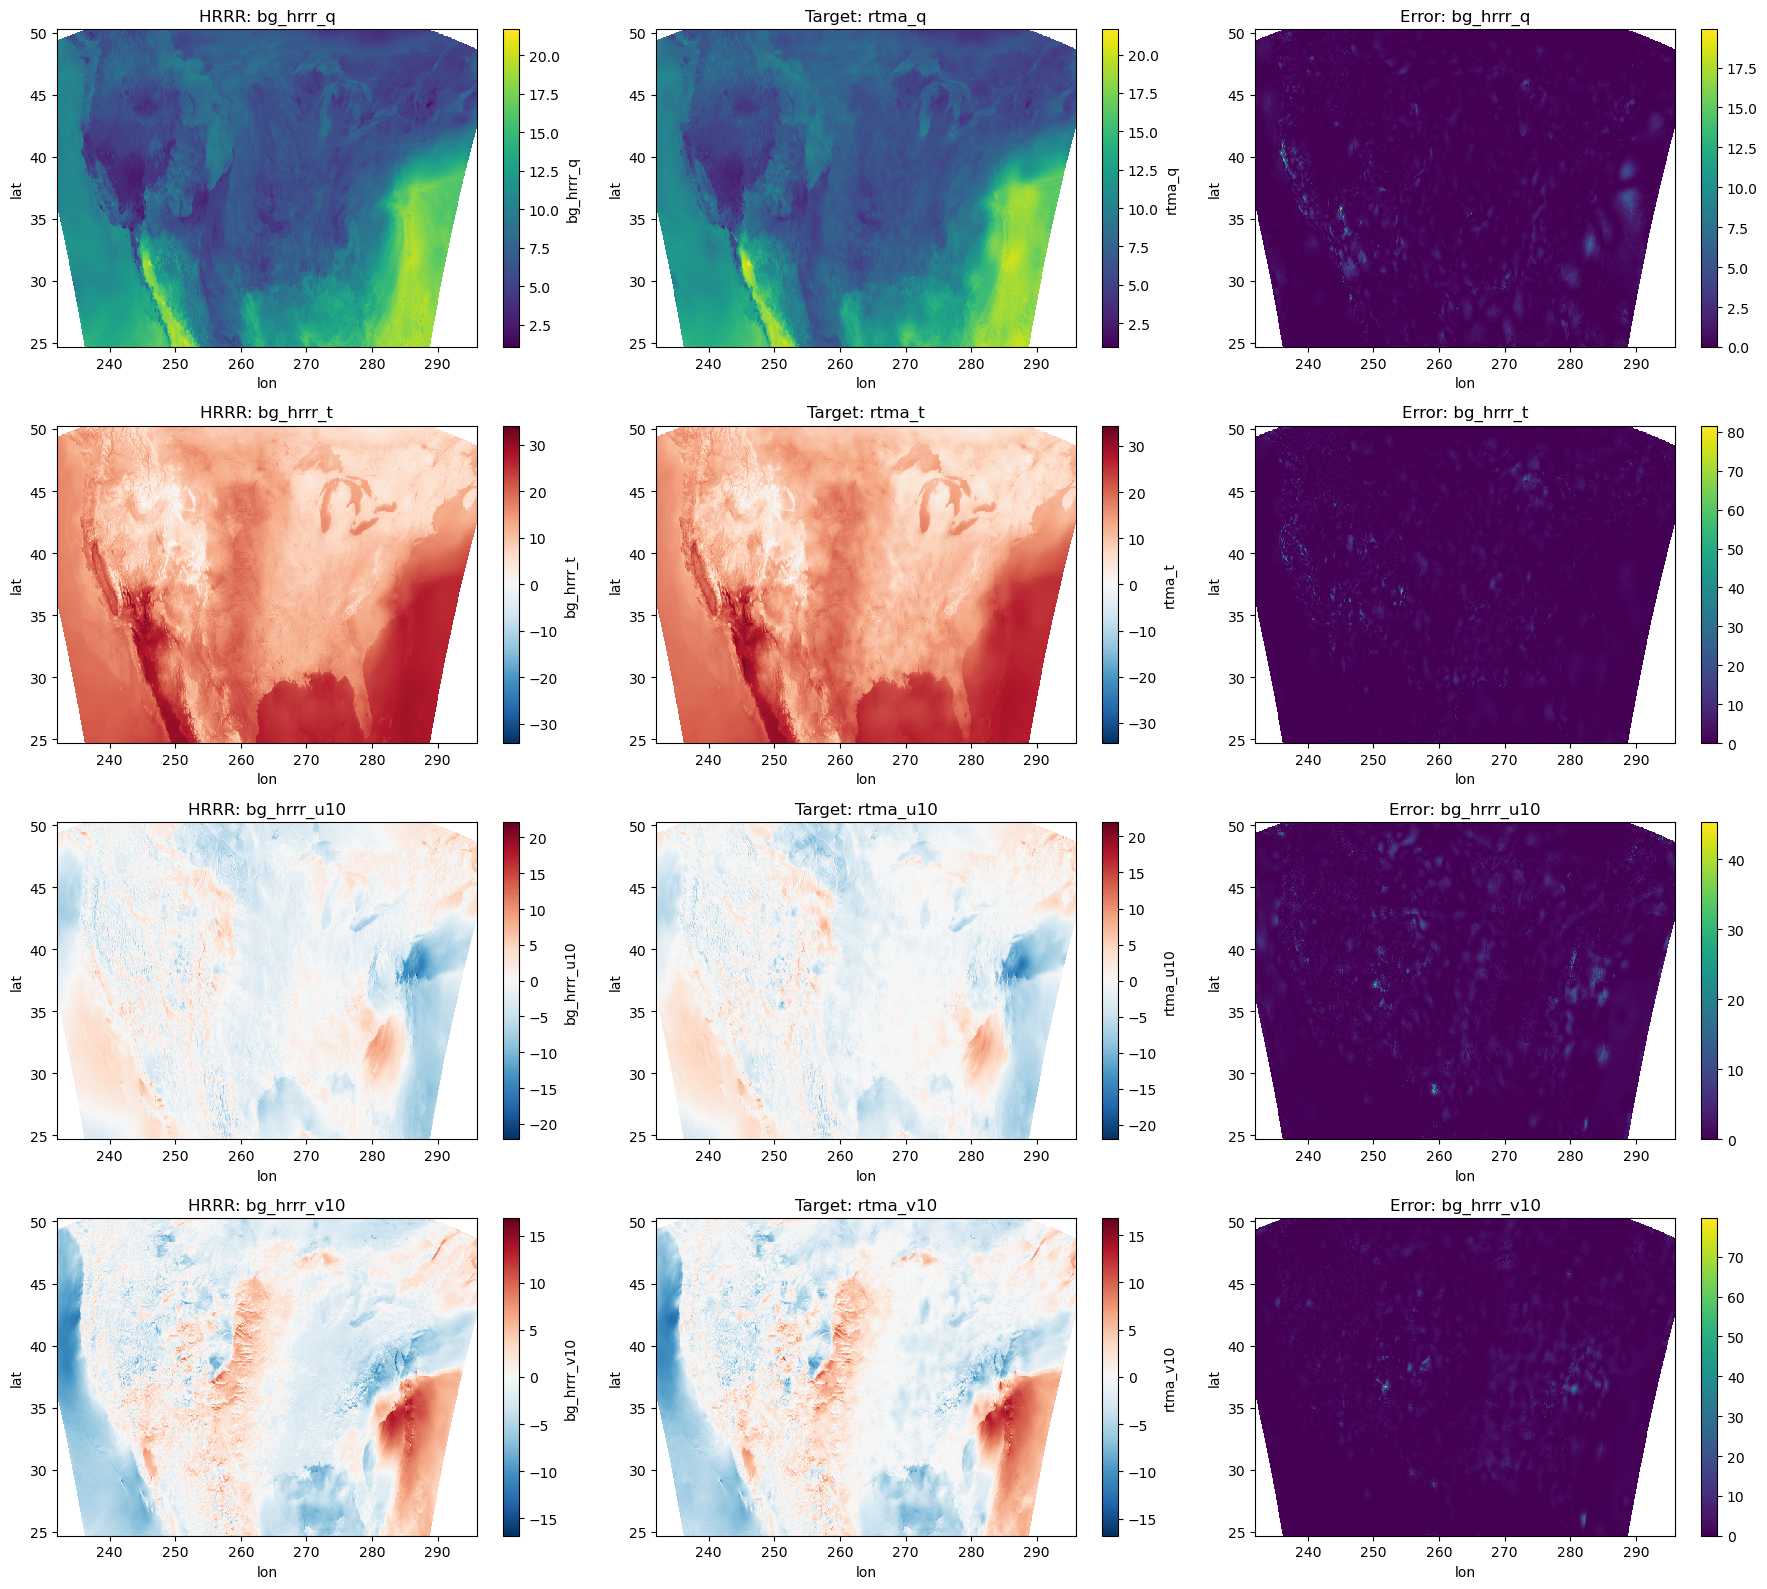

In [157]:
import matplotlib.pyplot as plt

# Define the variable names
bg_hrrr_names = ['bg_hrrr_q', 'bg_hrrr_t', 'bg_hrrr_u10', 'bg_hrrr_v10']
target_names = ['rtma_q', 'rtma_t', 'rtma_u10', 'rtma_v10']

# Number of variables
num_vars = len(bg_hrrr_names)

# Create a figure for plotting
fig, axes = plt.subplots(nrows=num_vars, ncols=3, figsize=(18, 4 * num_vars))
axes = axes.reshape(num_vars, 3)  # Ensure axes is a 2D array

bg_errors = []

# Iterate through the variables
for idx, (bg_hrrr_name, target_name) in enumerate(zip(bg_hrrr_names, target_names)):
    # Get the data arrays
    bg_hrrr_data = output_ds[bg_hrrr_name]
    target_data = output_ds[target_name]
    # Compute the bg error
    bg_error = (bg_hrrr_data - target_data)**2
    
    bg_hrrr_data.plot(ax=axes[idx, 0])
    axes[idx, 0].set_title(f'HRRR: {bg_hrrr_name}')

    # Plot target data
    target_data.plot(ax=axes[idx, 1])
    axes[idx, 1].set_title(f'Target: {target_name}')
    
    # Plot error data
    bg_error.plot(ax=axes[idx, 2])
    axes[idx, 2].set_title(f'Error: {bg_hrrr_name}')

    bg_errors.append(bg_error)

# Adjust layout
plt.tight_layout()
plt.show()

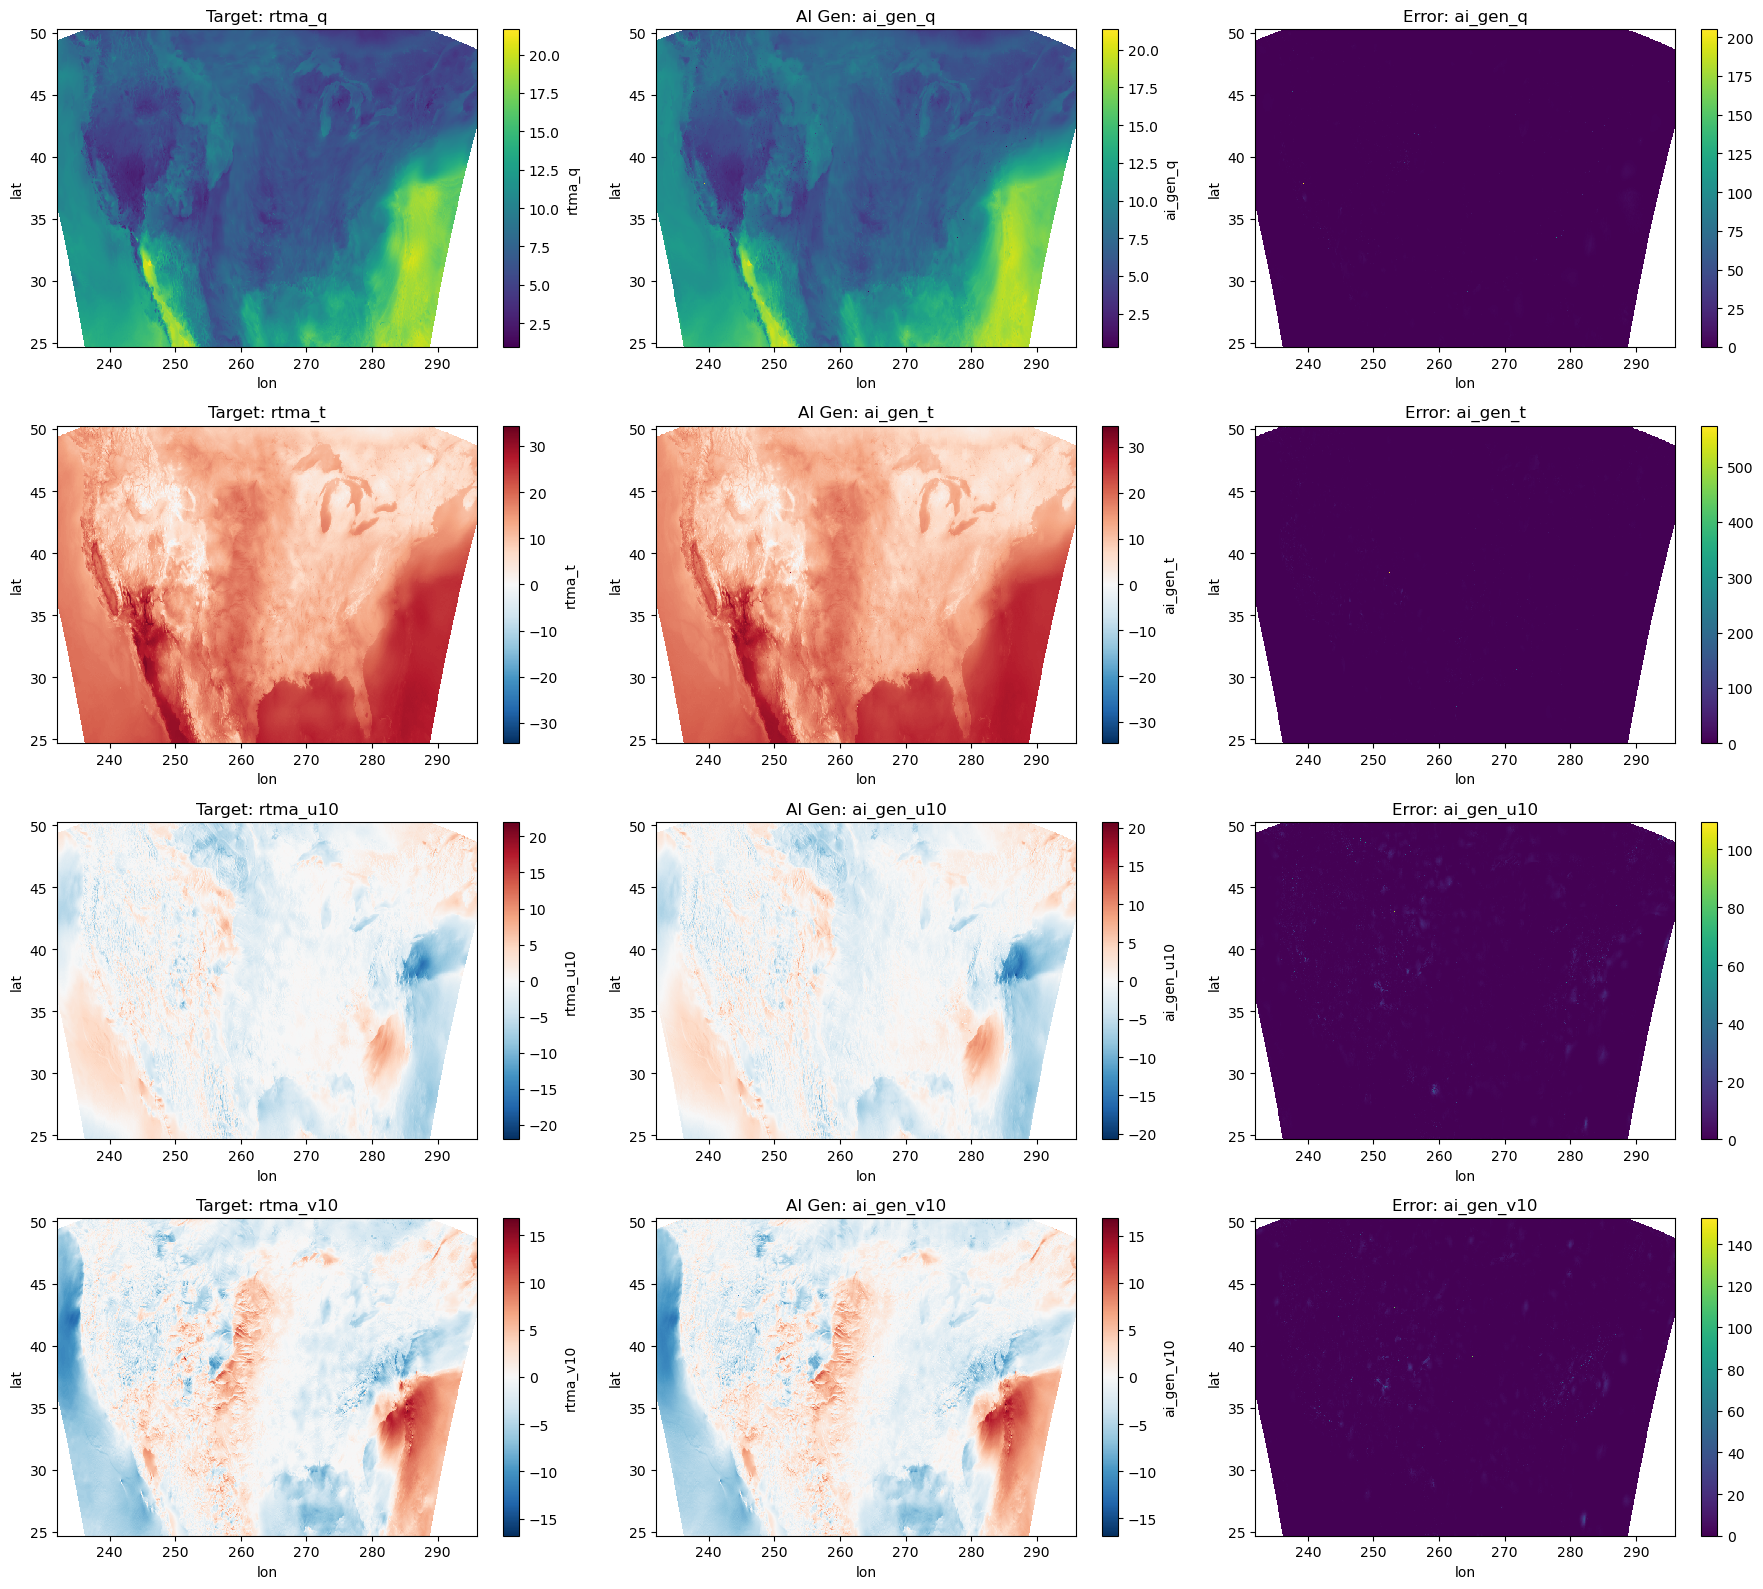

In [156]:
import matplotlib.pyplot as plt

# Define the variable names
ai_gen_names = ['ai_gen_q', 'ai_gen_t', 'ai_gen_u10', 'ai_gen_v10']
target_names = ['rtma_q', 'rtma_t', 'rtma_u10', 'rtma_v10']

# Number of variables
num_vars = len(ai_gen_names)

# Create a figure for plotting
fig, axes = plt.subplots(nrows=num_vars, ncols=3, figsize=(18, 4 * num_vars))
axes = axes.reshape(num_vars, 3)  # Ensure axes is a 2D array

ai_errors = []

# Iterate through the variables
for idx, (ai_gen_name, target_name) in enumerate(zip(ai_gen_names, target_names)):
    # Get the data arrays
    ai_gen_data = output_ds[ai_gen_name]
    target_data = output_ds[target_name]
    ai_error = (ai_gen_data - target_data)**2

    # Plot AI generated data
    ai_gen_data.plot(ax=axes[idx, 1])
    axes[idx, 1].set_title(f'AI Gen: {ai_gen_name}')

    # Plot target data
    target_data.plot(ax=axes[idx, 0])
    axes[idx, 0].set_title(f'Target: {target_name}')
    
    # Plot error data
    ai_error.plot(ax=axes[idx, 2])
    axes[idx, 2].set_title(f'Error: {ai_gen_name}')

    ai_errors.append(ai_error)

# Adjust layout
plt.tight_layout()
plt.show()

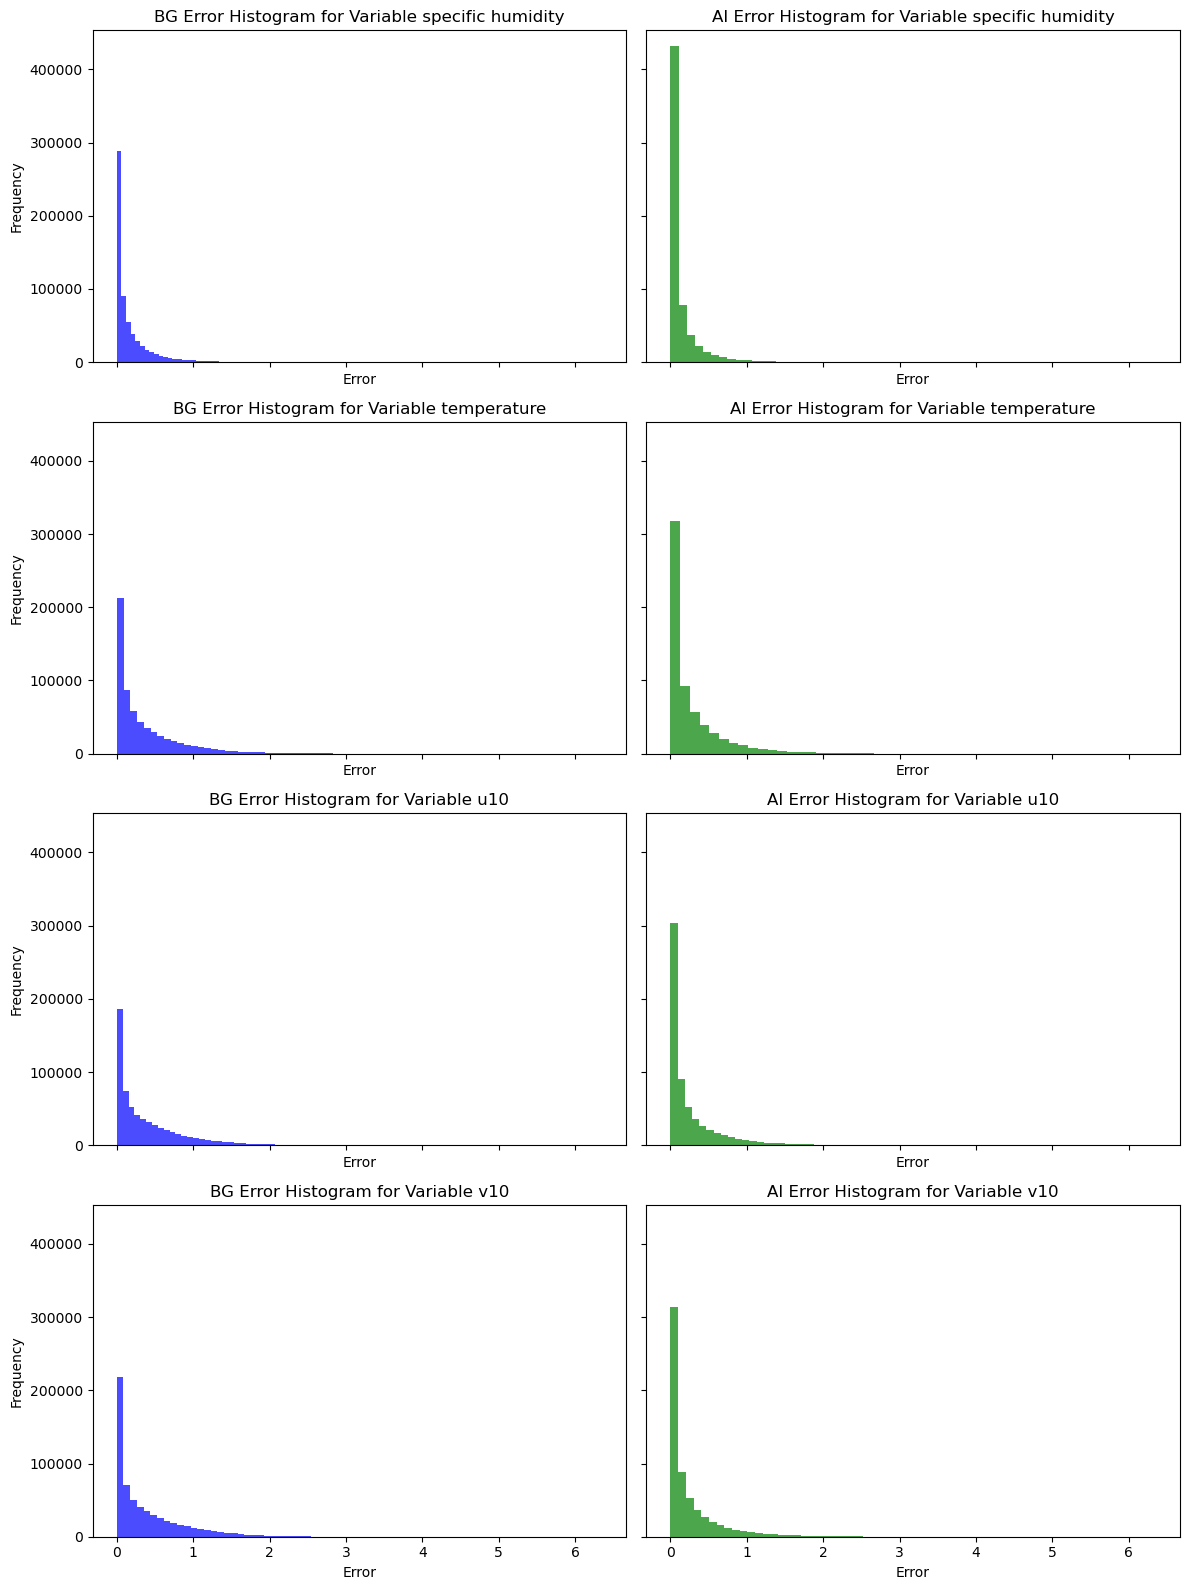

In [168]:
import matplotlib.pyplot as plt

# Assuming bg_errors and ai_errors are lists of arrays with pixel-wise MSE
# and num_vars is the number of variables
num_vars = len(bg_errors)

names = ["specific humidity", "temperature", "u10", "v10"]

# Create a figure for plotting
fig, axes = plt.subplots(nrows=num_vars, ncols=2, figsize=(12, 4 * num_vars), sharex=True, sharey=True)
axes = axes.reshape(num_vars, 2)  # Ensure axes is a 2D array

# Iterate through the variables
for idx in range(num_vars):
    # Get the error data for the current variable
    bg_error_data = bg_errors[idx].values.flatten()  # Flatten to 1D for histogram
    ai_error_data = ai_errors[idx].values.flatten() # Flatten to 1D for histogram
    
    # Take the logarithm of the errors
    log_bg_error_data = np.log1p(bg_error_data)
    log_ai_error_data = np.log1p(ai_error_data)
    # Plot histogram for bg_errors
    axes[idx, 0].hist(log_bg_error_data, bins=50, color='blue', alpha=0.7)
    axes[idx, 0].set_title(f'BG Error Histogram for Variable {names[idx]}')
    axes[idx, 0].set_xlabel('Error')
    axes[idx, 0].set_ylabel('Frequency')
    # Plot histogram for ai_errors
    axes[idx, 1].hist(log_ai_error_data, bins=50, color='green', alpha=0.7)
    axes[idx, 1].set_title(f'AI Error Histogram for Variable {names[idx]}')
    axes[idx, 1].set_xlabel('Error')

# Adjust layout
plt.tight_layout()
plt.show()

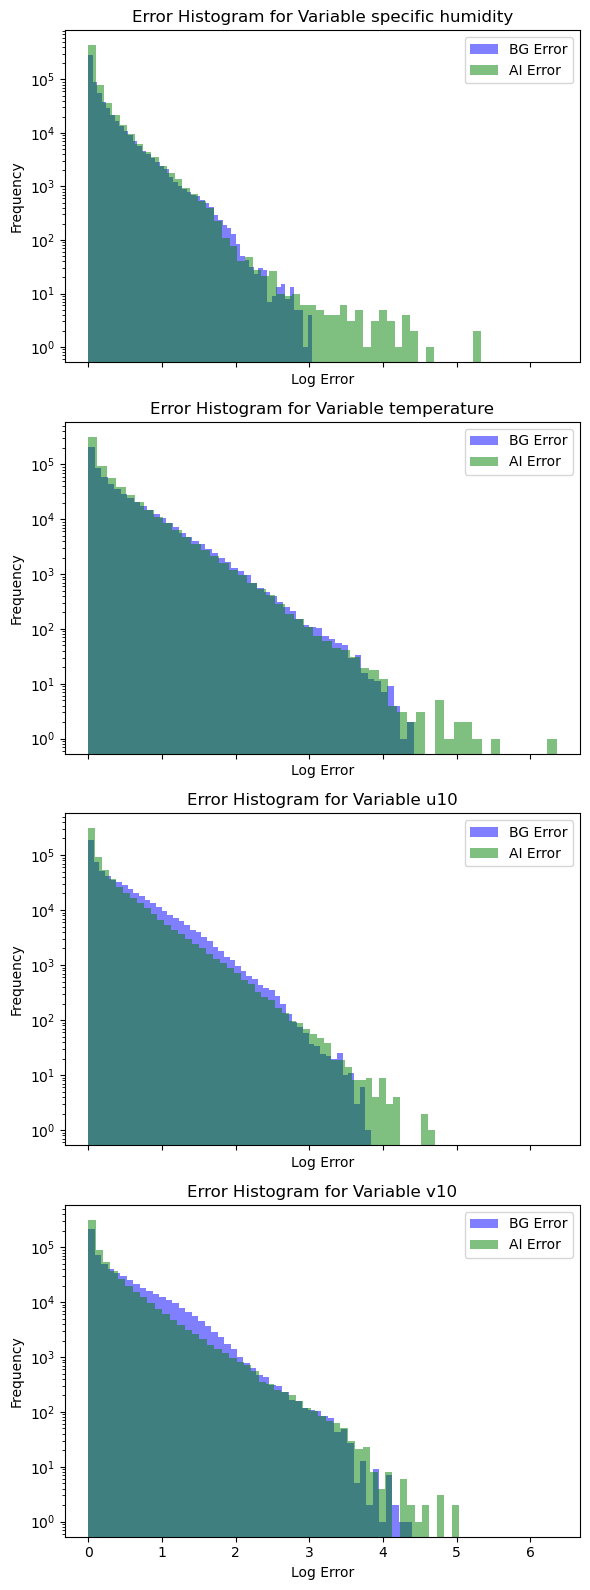

In [173]:
import numpy as np
import matplotlib.pyplot as plt

# Assuming bg_errors and ai_errors are lists of arrays with pixel-wise MSE
# and num_vars is the number of variables
num_vars = len(bg_errors)

names = ["specific humidity", "temperature", "u10", "v10"]

# Create a figure for plotting
fig, axes = plt.subplots(nrows=num_vars, ncols=1, figsize=(6, 4 * num_vars), sharex=True)

# Iterate through the variables
for idx in range(num_vars):
    # Get the error data for the current variable
    bg_error_data = bg_errors[idx].values.flatten()  # Flatten to 1D for histogram
    ai_error_data = ai_errors[idx].values.flatten()  # Flatten to 1D for histogram
    
    # Take the logarithm of the errors
    log_bg_error_data = np.log1p(bg_error_data)
    log_ai_error_data = np.log1p(ai_error_data)
    
    axes[idx].hist(log_bg_error_data, bins=50, color='blue', alpha=0.5, label='BG Error')
    axes[idx].hist(log_ai_error_data, bins=50, color='green', alpha=0.5, label='AI Error')
    axes[idx].set_title(f'Error Histogram for Variable {names[idx]}')
    axes[idx].set_xlabel('Log Error')
    axes[idx].set_ylabel('Frequency')
    axes[idx].set_yscale('log')
    axes[idx].legend()

# Adjust layout
plt.tight_layout()
plt.show()